## Problem Statement
Identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

Assuming 'loan_status' as the driver variable to differentiate the defaulters.

In [440]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


## Data Understanding

In [441]:
#Read the data from the CSV file and create DataFrame
loanDF = pd.read_csv("loan.csv", low_memory=False)

In [442]:
#Check the column and row values
loanDF.shape

(39717, 111)

In [443]:
#Print the first few rows for reading the data
loanDF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Data cleaning

- Identify the null columns and remove all the null columns from the dataframe
- Remove the columns which doesn't add any value to the analysis
- Identify the invalid values in the column and correct it

In [444]:
# Check the columns with null values
loanDF.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### Dropping all the columns with 0 non-null values

In [445]:
#Drop the columns with only null values
loanDF.dropna(how='all', inplace=True, axis=1)

In [446]:
print(loanDF.isnull().sum().sort_values(ascending=False))

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [447]:
#Calculating the percentage of missing values in each column
percent_missing = loanDF.isnull().sum() * 100 / len(loanDF)
print(percent_missing)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


### Removing the below columns due to high null value count
- next_pymnt_d
- mths_since_last_record
- mths_since_last_delinq

In [448]:
#Removing the additional columns which has high percentage of null values
loanDF.drop(["next_pymnt_d","mths_since_last_record","mths_since_last_delinq"],axis=1)

static_val_dict = []

for column in loanDF.columns:
    if len(loanDF[column].value_counts()) == 1:
        static_val_dict.append(loanDF[column].value_counts())
        print(loanDF[column].value_counts())
        

n    39717
Name: pymnt_plan, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
1    39717
Name: policy_code, dtype: int64
INDIVIDUAL    39717
Name: application_type, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64
0.0    39678
Name: tax_liens, dtype: int64


### Removing the below columns because it contains single values and it doesn't add value to the analysis
- pymnt_plan
- initial_list_status
- collections_12_mths_ex_med
- policy_code
- application_type
- acc_now_delinq
- chargeoff_within_12_mths
- delinq_amnt
- tax_liens

In [449]:
#remove the columns next_pymnt_d,mths_since_last_delinq, mths_since_last_record, desc as these contain lot of NULL values
remove_cols = ["pymnt_plan", "initial_list_status", "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"]
loanDF = loanDF.drop(columns=remove_cols)
print(loanDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [450]:
print(loanDF.isnull().sum().sort_values(ascending=False))

next_pymnt_d               38577
mths_since_last_record     36931
mths_since_last_delinq     25682
desc                       12940
emp_title                   2459
emp_length                  1075
pub_rec_bankruptcies         697
last_pymnt_d                  71
revol_util                    50
title                         11
last_credit_pull_d             2
recoveries                     0
total_acc                      0
open_acc                       0
pub_rec                        0
revol_bal                      0
last_pymnt_amnt                0
out_prncp                      0
total_rec_late_fee             0
out_prncp_inv                  0
total_pymnt                    0
inq_last_6mths                 0
total_rec_prncp                0
collection_recovery_fee        0
total_rec_int                  0
total_pymnt_inv                0
id                             0
earliest_cr_line               0
home_ownership                 0
loan_amnt                      0
funded_amn

In [451]:
#next_pymnt_d column has null count value closer to the total count.
loanDF.next_pymnt_d.value_counts().sort_values(ascending=False)

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [452]:
#remove the columns next_pymnt_d,mths_since_last_delinq, mths_since_last_record, desc as these contain lot of NULL values
remove_cols = ["next_pymnt_d", "mths_since_last_delinq", "mths_since_last_record", "desc"]
loanDF = loanDF.drop(columns=remove_cols)

In [453]:
loanDF.shape

(39717, 44)

In [454]:
#Remove the % symbol from the in_rate column to analyse the interest rate
loanDF["int_rate"] = loanDF.int_rate.apply(lambda x: x[:-1] ).astype("float64")

## Final data for analysis

In [455]:
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [456]:
loanDF.shape

(39717, 44)

## Data Analysis

In [457]:
loanDF.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


### List of caetgorical columns
- term
- grade
- sub_grade
- emp_length
- home_ownership
- verification_status
- purpose

### List of Numerical columns
- loan_amnt
- funded_amnt
- funded_amnt_inv
- int_rate
- installment
- emp_length
- annual_inc
- dti
- open_acc
- pub_rec
- total_acc
- total_rec_late_fee

In [458]:
#Create a flag for defaulted customers
loanDF['default'] = loanDF['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [459]:
#creating list for categorical variables
catergorical_list = ["term", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "purpose"]


In [460]:
#creating list for numerical variables
numerical_list = ["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","emp_length","annual_inc","dti","open_acc","pub_rec","total_acc","total_rec_late_fee"]


In [461]:
loanDF[numerical_list].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,total_acc,total_rec_late_fee
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,9.294408,0.055065,22.088828,1.363015
std,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,4.400282,0.237200,11.401709,7.289979
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,2.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,6.000000,0.000000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,9.000000,0.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,12.000000,0.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,44.000000,4.000000,90.000000,180.200000


In [462]:
for col in catergorical_list:
    print(loanDF.groupby(by=col).size())
    print("-----------------------------------")

term
 36 months    29096
 60 months    10621
dtype: int64
-----------------------------------
grade
A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
dtype: int64
-----------------------------------
sub_grade
A1    1139
A2    1508
A3    1810
A4    2886
A5    2742
B1    1830
B2    2057
B3    2917
B4    2512
B5    2704
C1    2136
C2    2011
C3    1529
C4    1236
C5    1186
D1     931
D2    1348
D3    1173
D4     981
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G3      48
G4      56
G5      30
dtype: int64
-----------------------------------
emp_length
1 year       3240
10+ years    8879
2 years      4388
3 years      4095
4 years      3436
5 years      3282
6 years      2229
7 years      1773
8 years      1479
9 years      1258
< 1 year     4583
dtype: int64
-----------------------------------
home_ownership
MORTGAGE    17659
NONE            3
OTHER          98
OWN

#### Checking the unique values and counts for each categorical values

In [463]:
loanDF = loanDF[ (loanDF["loan_status"] == 'Charged Off') |  (loanDF["loan_status"]=='Fully Paid')]

#### Removing the rows related to 'Current' loan as it won;t help in finding the defaulters

## Univariate analysis for Numerical values

In [464]:
def dist_plot(col, title, isBox=False):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    #Dist plot
    sns.set(style="darkgrid")
    sns.distplot(loanDF[col],
                 rug=True,
                 kde_kws={"color": "g", "alpha": 0.3, "linewidth": 5, "shade": True})
    plt.suptitle(title)
    if isBox:
        plt.subplot(1,2,2)
        #Box plot
        loanDF[col].plot.box()
    plt.show
    

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

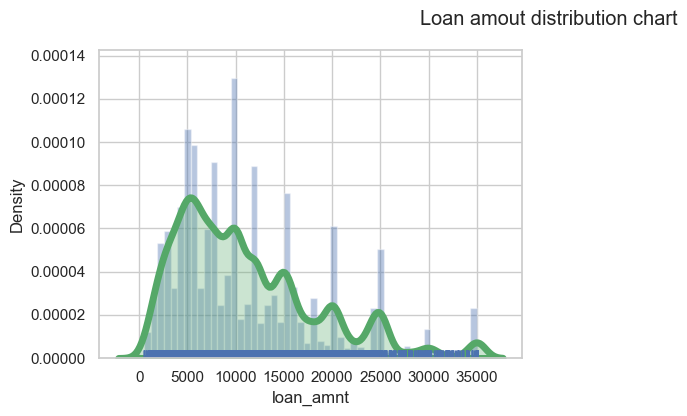

In [465]:
dist_plot("loan_amnt", "Loan amout distribution chart")
loanDF["loan_amnt"].describe()

#### Observation : The loan amout varies between 500-35000 with the median value of 9600 for all the 'Fully paid' and 'Charged-off' customers. Most of the customers have the loan between 5300 to 15000.

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

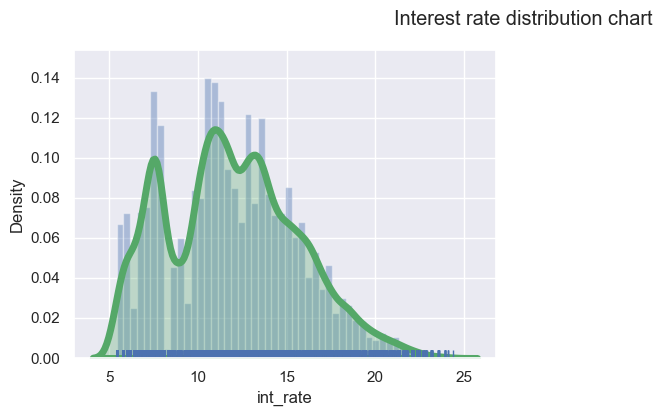

In [466]:
dist_plot("int_rate", "Interest rate distribution chart")
loanDF["int_rate"].describe()

#### Observation : The interest rate provided for the loans range between 5-24 and the majority of it lies between 8-14

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

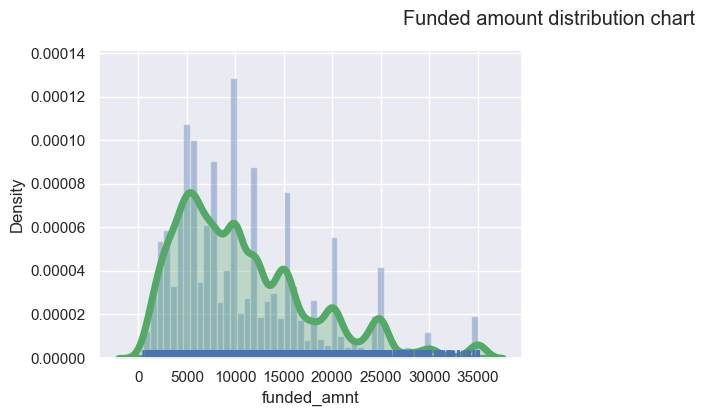

In [467]:
dist_plot("funded_amnt", "Funded amount distribution chart")
loanDF["funded_amnt"].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

#### Observation : The loan amout varies between 500-35000 with the median value of 9600 for all the 'Fully paid' and 'Charged-off' customers. Most of the customers have the loan between 5300 to 15000.

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
90%      19975.000000
95%      24500.066590
99%      34715.012285
max      35000.000000
Name: funded_amnt_inv, dtype: float64

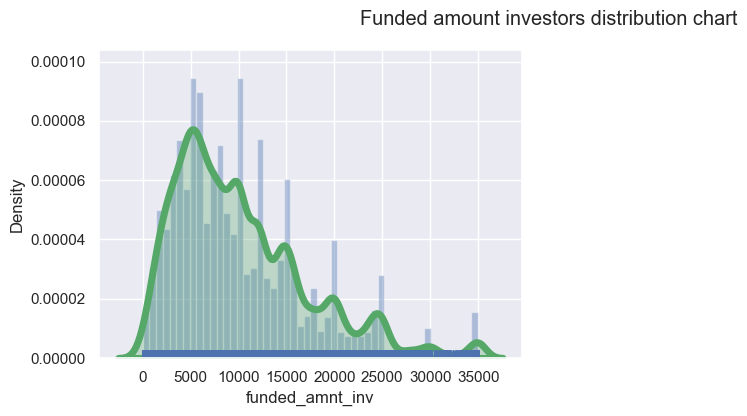

In [468]:
dist_plot("funded_amnt_inv", "Funded amount investors distribution chart")
loanDF["funded_amnt_inv"].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

#### Observation : The loan amout varies between 500-35000 with the median value of 9600 for all the 'Fully paid' and 'Charged-off' customers. Most of the customers have the loan between 5300 to 15000.

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
90%        620.900000
95%        760.820000
99%        931.090000
max       1305.190000
Name: installment, dtype: float64

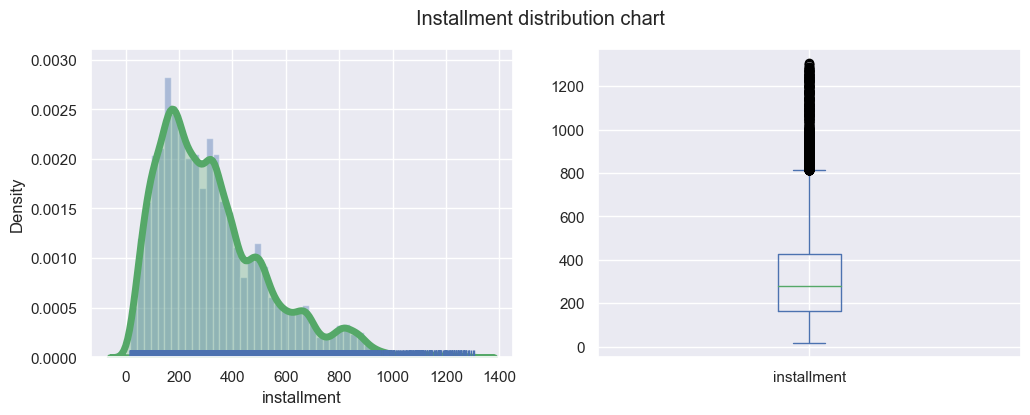

In [469]:
dist_plot("installment", "Installment distribution chart", True)
loanDF["installment"].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

#### Observation: The installement is distributed between 165-425. The 99th percentile has 931 and the max is 1305, which has the outlier.

count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
90%         15.000000
95%         17.000000
99%         22.000000
max         44.000000
Name: open_acc, dtype: float64

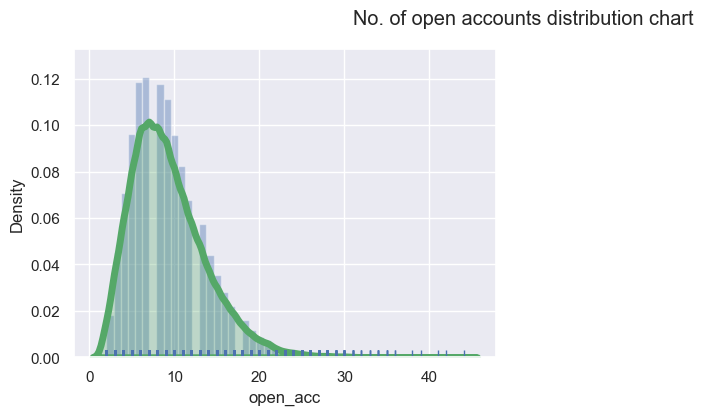

In [470]:
dist_plot("open_acc", "No. of open accounts distribution chart")
loanDF["open_acc"].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

#### Observation : The number of accounts varies between 2 and 22. It has the outlier of 44. We need to consider the rows which has the data between 2 and 22.

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
90%         22.290000
95%         23.800000
99%         26.530000
max         29.990000
Name: dti, dtype: float64

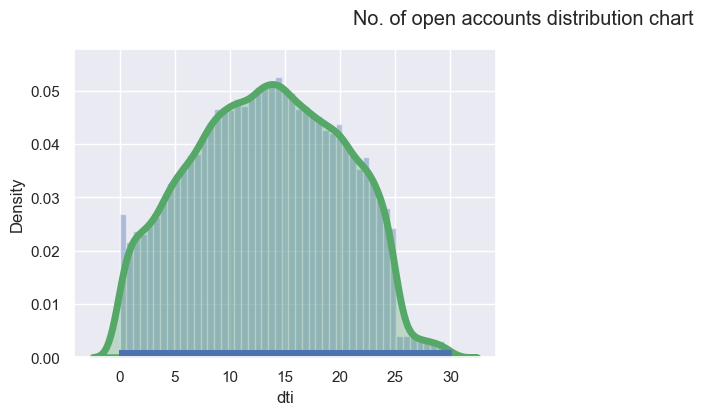

In [471]:
dist_plot("dti", "No. of open accounts distribution chart")
loanDF["dti"].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

## Univariate for categorical values

#### Count plot for the categorical variable to understand the distribution
- term
- grade
- sub_grade
- emp_length
- home_ownership
- verification_status
- purpose

In [472]:
def count_plot(col, title):
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=loanDF,order=loanDF[col].value_counts().index.sort_values())
    plt.suptitle(title)
    plt.show()

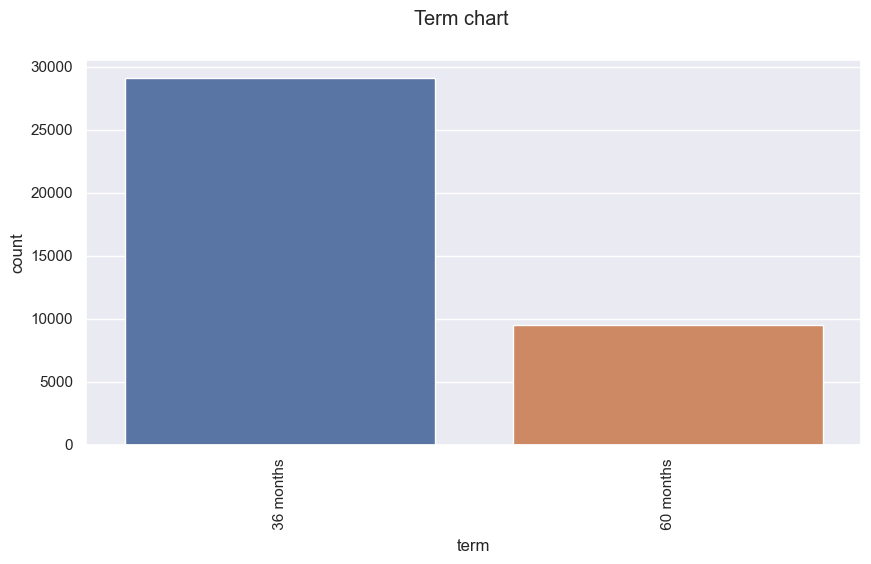

term
 36 months    29096
 60 months     9481
dtype: int64

In [473]:
count_plot("term", "Term chart")
loanDF.groupby(by="term").size()

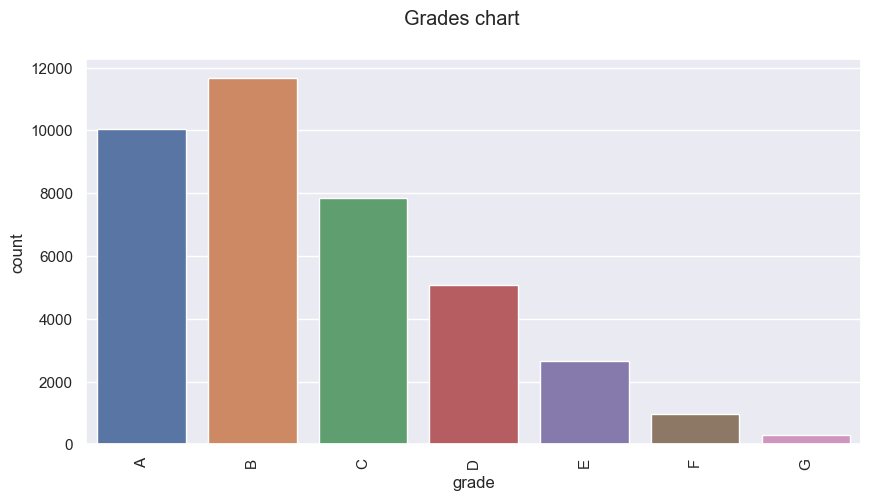

grade
A    10045
B    11675
C     7834
D     5085
E     2663
F      976
G      299
dtype: int64

In [474]:
count_plot("grade", "Grades chart")
loanDF.groupby(by="grade").size()

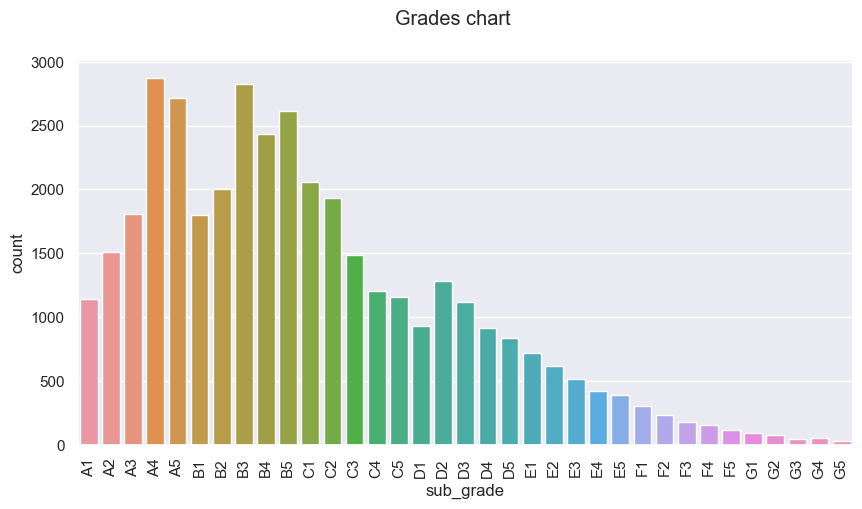

sub_grade
A1    1139
A2    1508
A3    1810
A4    2873
A5    2715
B1    1797
B2    2001
B3    2825
B4    2437
B5    2615
C1    2055
C2    1931
C3    1488
C4    1206
C5    1154
D1     931
D2    1286
D3    1116
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G3      45
G4      54
G5      29
dtype: int64

In [475]:
count_plot("sub_grade", "Grades chart")
loanDF.groupby(by="sub_grade").size()

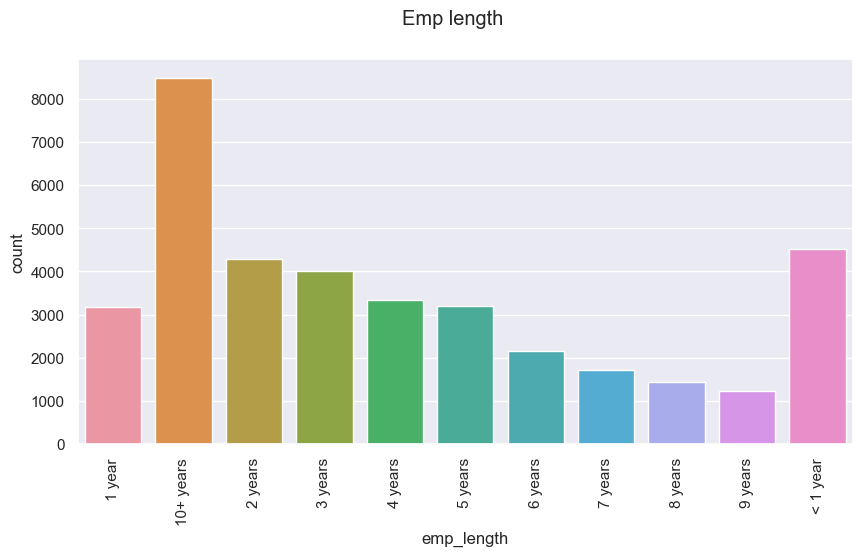

emp_length
1 year       3169
10+ years    8488
2 years      4291
3 years      4012
4 years      3342
5 years      3194
6 years      2168
7 years      1711
8 years      1435
9 years      1226
< 1 year     4508
dtype: int64

In [476]:
count_plot("emp_length", "Emp length")
loanDF.groupby(by="emp_length").size()

## Bivariate analysis

<Axes: xlabel='loan_status', ylabel='annual_inc'>

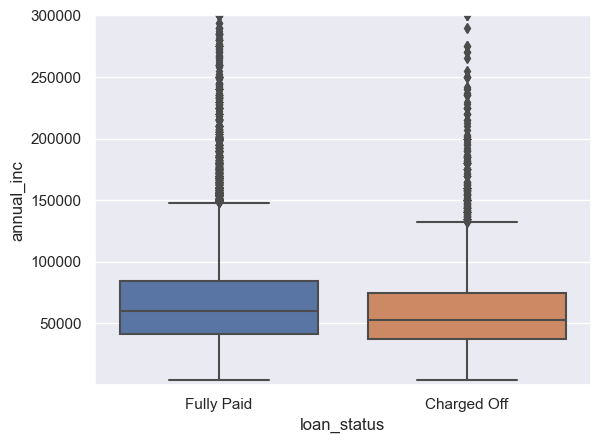

In [477]:
plt.ylim(10, 300000)
sns.set_style("whitegrid") 
sns.boxplot(x = loanDF['loan_status'], y = loanDF['annual_inc'])

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

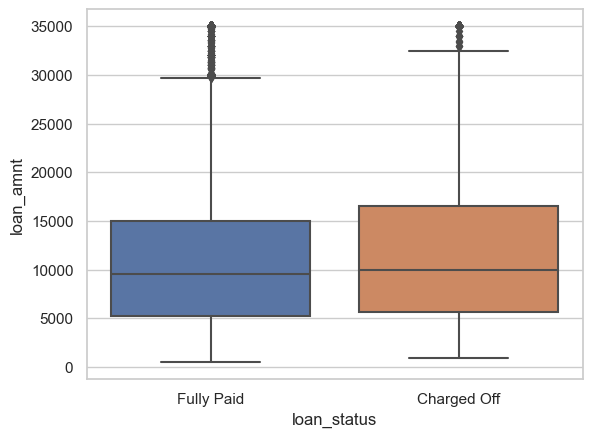

In [478]:
sns.set_style("whitegrid") 
sns.boxplot(x = loanDF['loan_status'], y = loanDF['loan_amnt']) 
loanDF["loan_amnt"].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

Charged Off Length :  5627
Charged Of with own home :  443
Charged Off with RENT and MORTGAGE :  5166
Percentage of Charged off people with RENT and MORTAGE :  91.80735738404124


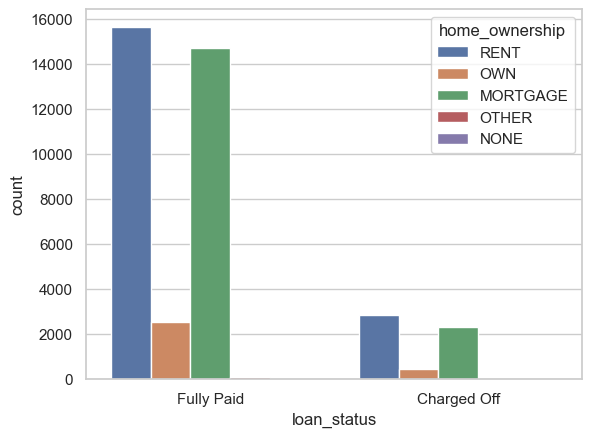

In [479]:
#Logic to find out the relation between the different categories of home ownership against the loan status
sns.countplot(loanDF, x="loan_status", hue="home_ownership")
charged_off_len = len(loanDF[(loanDF["loan_status"]=="Charged Off")])
charged_off_with_no_own_home_len = len(loanDF[(loanDF["loan_status"]=="Charged Off") &( (loanDF["home_ownership"]=="RENT") | (loanDF["home_ownership"]=="MORTGAGE"))])
charged_off_with_own_home_len = len(loanDF[(loanDF["loan_status"]=="Charged Off") & (loanDF["home_ownership"]=="OWN") ])
print("Charged Off Length : ", charged_off_len)
print("Charged Of with own home : ", charged_off_with_own_home_len)
print("Charged Off with RENT and MORTGAGE : ", charged_off_with_no_own_home_len)
print("Percentage of Charged off people with RENT and MORTAGE : ",(charged_off_with_no_own_home_len/charged_off_len)*100)

#### Observation : 
- People with RENT and MORTAGE tend  default more due to those added commitments or maybe that is a explanation of their financial status to repay a loan.
- 91% of Charged Off people are either paying rent or Mortgage

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 4 entries, 5-10 to 20-25
Data columns (total 1 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   charged_off_to_fully_paid_ratio  4 non-null      object
dtypes: object(1)
memory usage: 248.0+ bytes


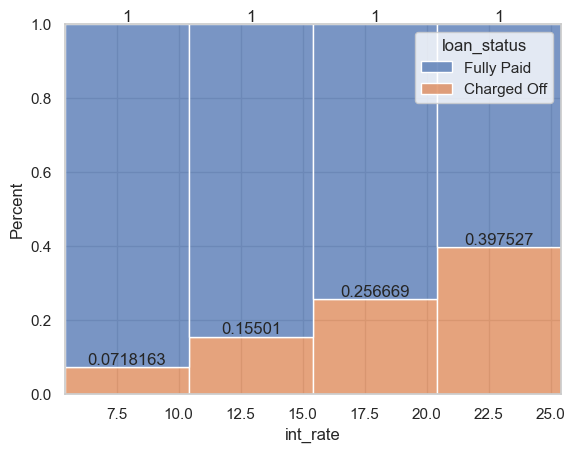

In [480]:
g = pd.cut(loanDF['int_rate'], 
           bins=[0,5,10,15,20,25], 
           labels = ['0-5','5-10','10-15','15-20','20-25'])
df_fp_co_ratio = loanDF.groupby(g, observed=True).apply(
    lambda d: pd.Series(
        {
            "charged_off_to_fully_paid_ratio" :d[d["loan_status"]=="Charged Off"].count()/d[d["loan_status"]=="Fully Paid"].count()
        }))

ax = sns.histplot( x=loanDF["int_rate"], hue = loanDF["loan_status"], binwidth=5, multiple="fill", stat = "percent")
for i in ax.containers:
    ax.bar_label(i,)
    
df_fp_co_ratio.info()


#### Observation : 
- As observed in the above graph, the defaulters increases with the increase in interest rate.

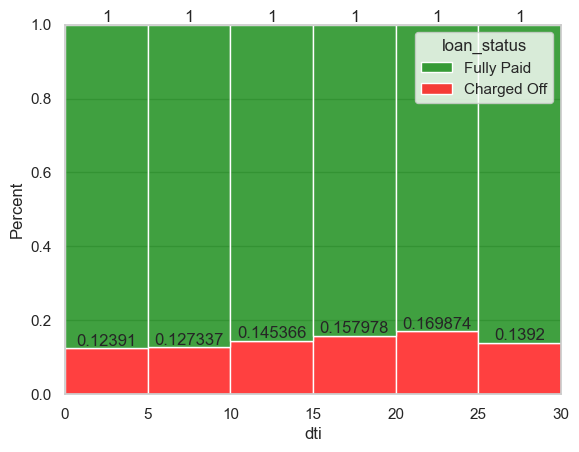

In [481]:
ax = sns.histplot(x=loanDF["dti"], hue = loanDF["loan_status"], multiple = "fill", stat = "percent", binwidth = 5, palette = ["green","red"])

for i in ax.containers:
    ax.bar_label(i,)

#### Observation : As we can see from the graph when the debt to income ratio of the customer increases, the ability to repay the loan reduces so charge Off percentage increases

In [490]:
#Filtering non null values from pub_rec_bankruptcies column 
publicDF = loanDF[loanDF["pub_rec_bankruptcies"].isin([0.0,1.0,2.0])]
publicDF.shape

(37880, 45)

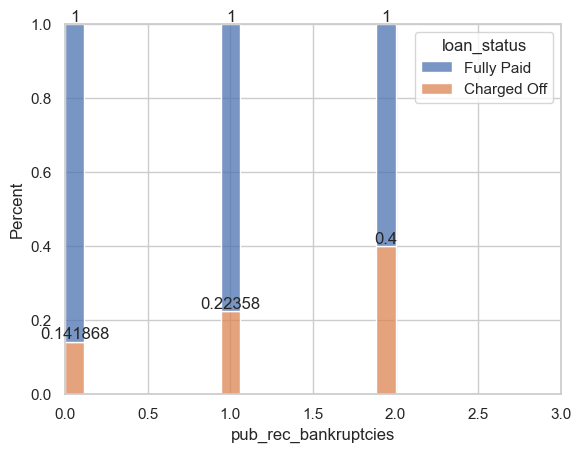

In [492]:
plt.xlim(0,3)
ax = sns.histplot(x=publicDF["pub_rec_bankruptcies"], hue = loanDF["loan_status"], multiple = "fill", stat = "percent")
for i in ax.containers:
    ax.bar_label(i,)

#### Observation: As observed in the above graph, the defaulters are increasing with the increase in public record bankrupcies.

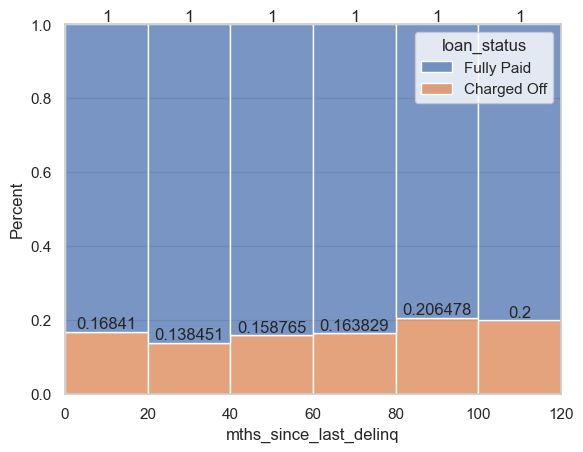

In [290]:
ax = sns.histplot(x=loanDF["mths_since_last_delinq"], hue = loanDF["loan_status"], stat = "percent", multiple='fill', binwidth = 20)

for i in ax.containers:
    ax.bar_label(i,)    

#### Observation : The graphs tends to move high at start and end..which might explain with a recent delinquency ,that might be the customer's habit and with a older delinquency customer's think its not dangerous since last delinquency was long ago,so they are unworried about it.

<BarContainer object of 14 artists>
<BarContainer object of 14 artists>


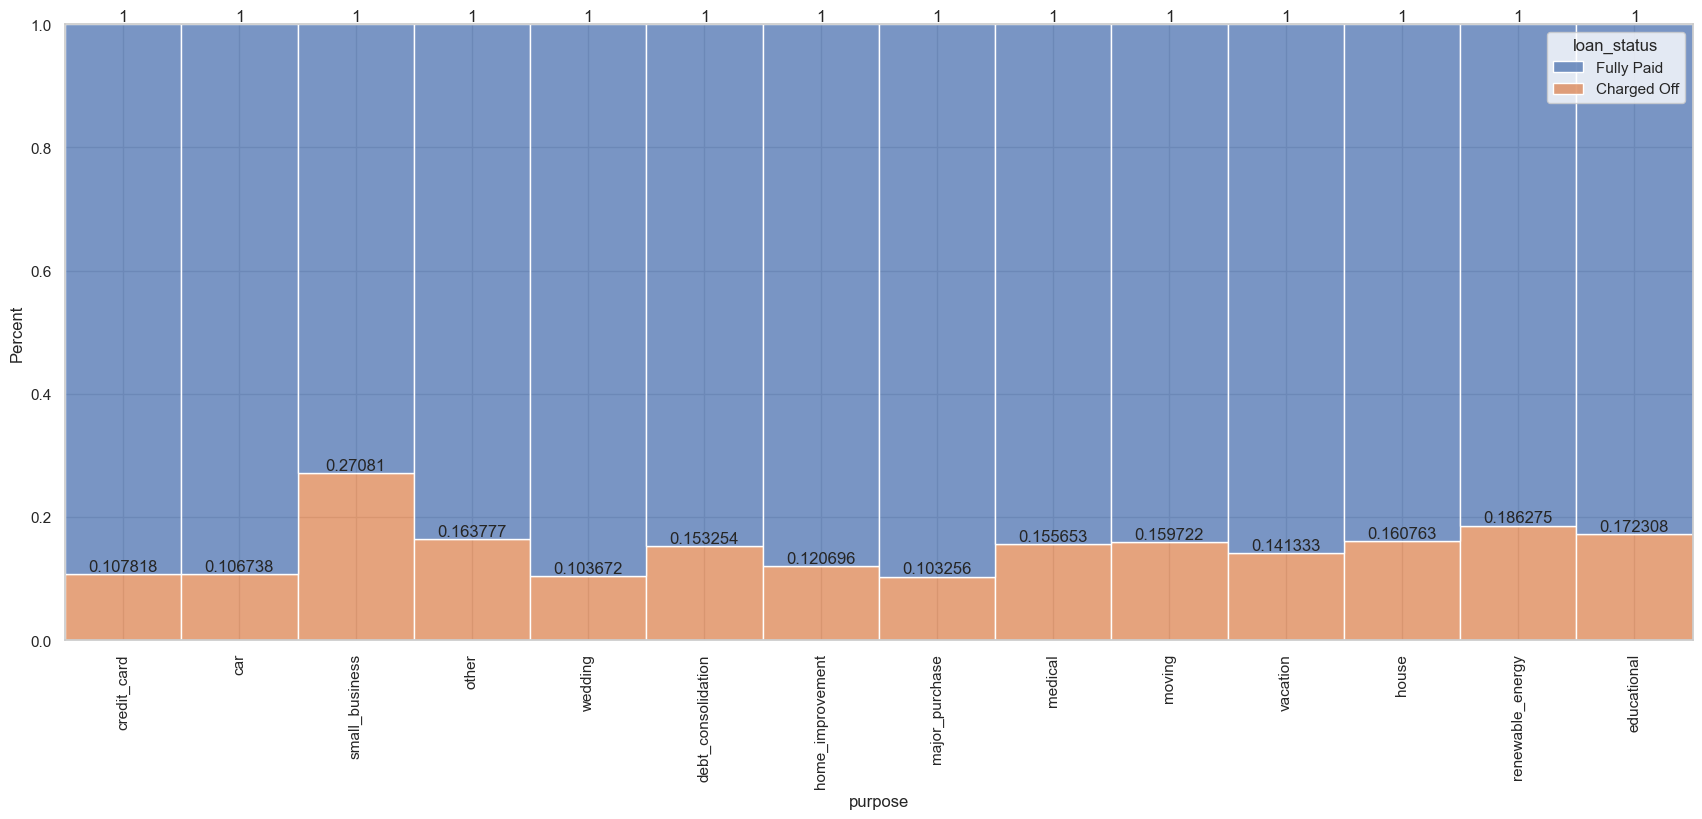

In [293]:
plt.figure(figsize=(21,8))
ax = sns.histplot(x=loanDF["purpose"],hue = loanDF["loan_status"],stat = "percent",multiple='fill')
plt.xticks(rotation=90)
for i in ax.containers:
    print(i)
    ax.bar_label(i,)

#### Higher percentage of defaulters fall in the top 3 categories of small businesses, renewable energy, education.

<Axes: xlabel='grade', ylabel='default'>

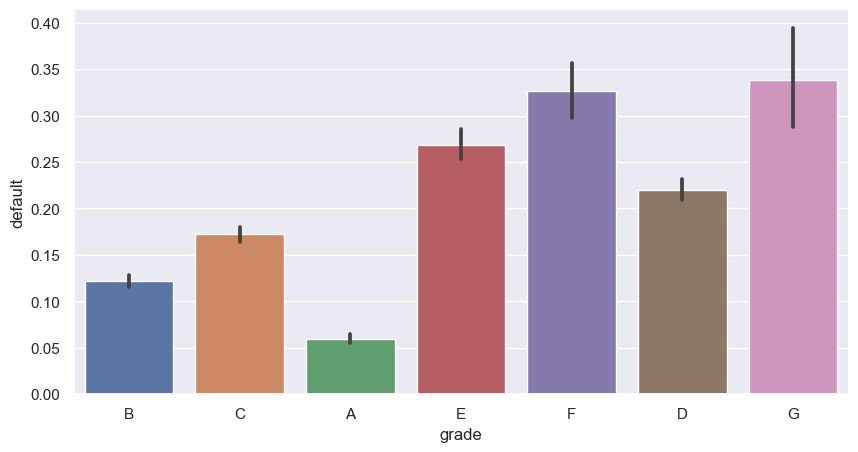

In [108]:
plt.subplots(figsize=(10, 5))
sns.barplot(data=loanDF, y='default', x='grade')

<Axes: xlabel='sub_grade', ylabel='default'>

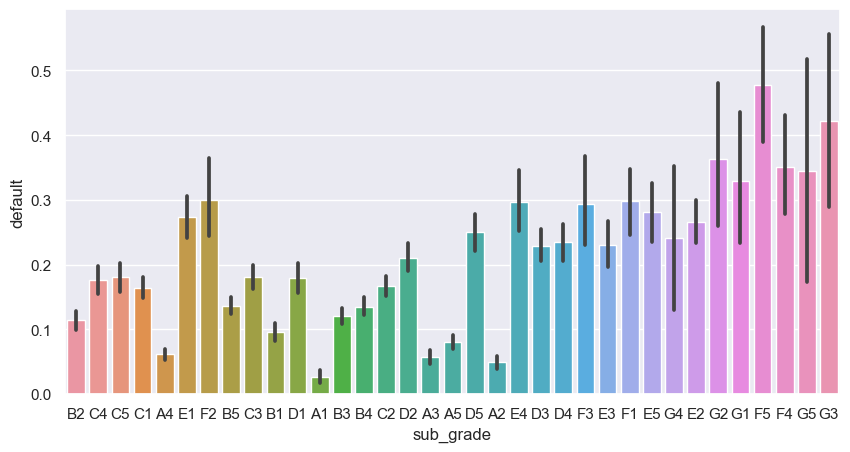

In [109]:
plt.subplots(figsize=(10, 5))
sns.barplot(data=loanDF, y='default', x='sub_grade')

## Multivariate analysis

<Axes: >

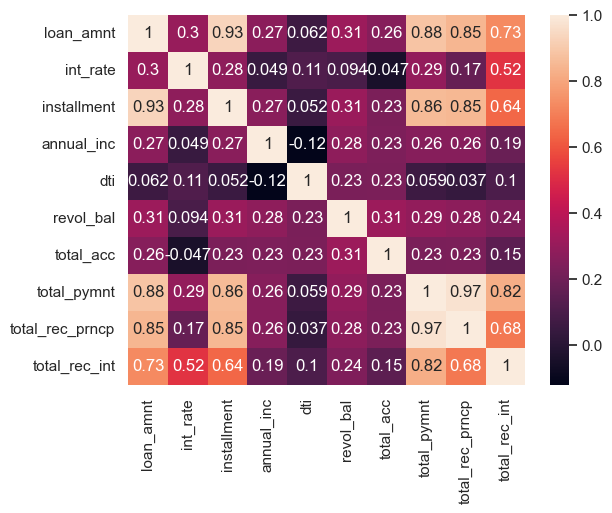

In [300]:
df_charged_off = loanDF[loanDF["loan_status"]=="Charged Off"]
df_fully_paid = loanDF[loanDF["loan_status"]=="Fully Paid"]
df_corr_columns = ["loan_amnt", "int_rate", "installment", "annual_inc", "dti", "revol_bal", "total_acc", "total_pymnt","total_rec_prncp","total_rec_int"]
df_corr = loanDF[df_corr_columns]
sns.heatmap(df_corr.corr(),annot=True)

<Axes: >

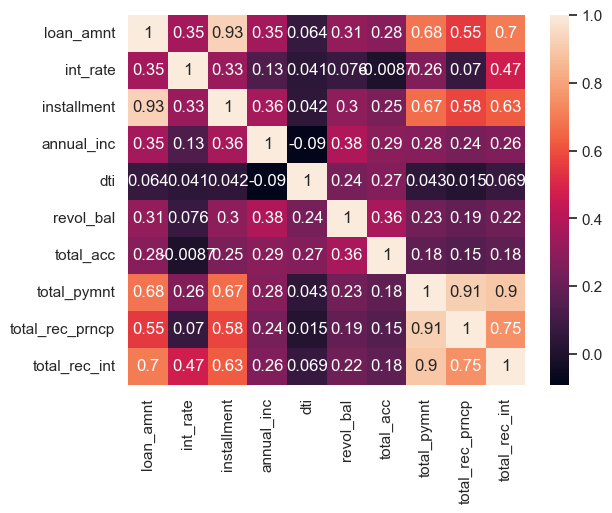

In [304]:
#Heatmap for the charged customers
df_corr_charged_off = df_charged_off[df_corr_columns]
sns.heatmap(df_corr_charged_off.corr(),annot=True)

<Axes: >

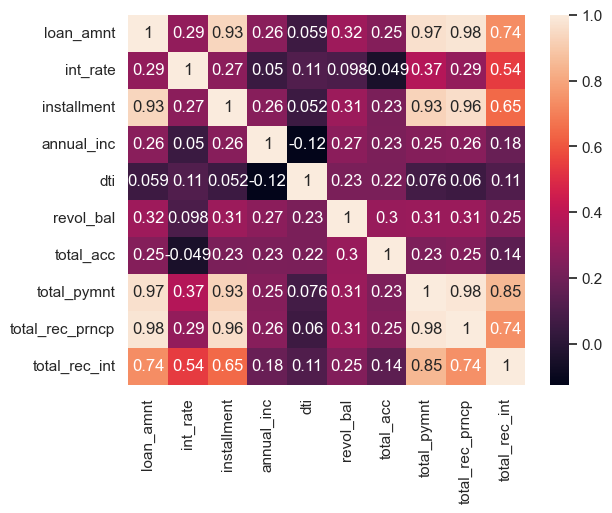

In [303]:
#Heatmap for the fully paid customers
df_corr_fully_paid = df_fully_paid[df_corr_columns]
sns.heatmap(df_corr_fully_paid.corr(),annot=True)

#### Observation : From the correlation matrix certain observations were made
-  Loan amount and installment amount are highly positively correlated
- Total payment , Total recovered principle and Total recovered interest are as a group highly positively correlated
- Loan amount is well positively correlated to the above group

## Derived metrics

<Axes: xlabel='loan_status', ylabel='payment_diff'>

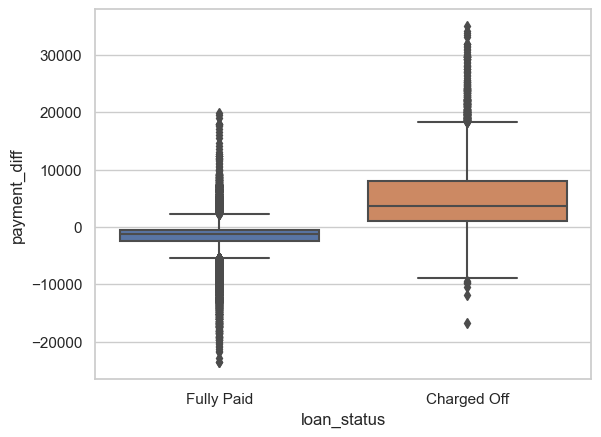

In [307]:
# Find diff between total payment and loan  amount check if charge off occurs when difference is less,ppl think they've paid enough
# Total received int/total_received principal
# Avg revolving credit balance

loanDF["payment_diff"]=loanDF["loan_amnt"]-loanDF["total_pymnt"]
loanDF["pymnt_percentage"] = loanDF["total_pymnt"]/loanDF["loan_amnt"]
sns.boxplot(x = loanDF['loan_status'], y = loanDF['payment_diff']) 



#### Observation : 25 -50% charge off happens when total payment reaches loan amnt, customers may think they have paid enough morally, if they are not able to pay financially.

<BarContainer object of 11 artists>
<BarContainer object of 11 artists>


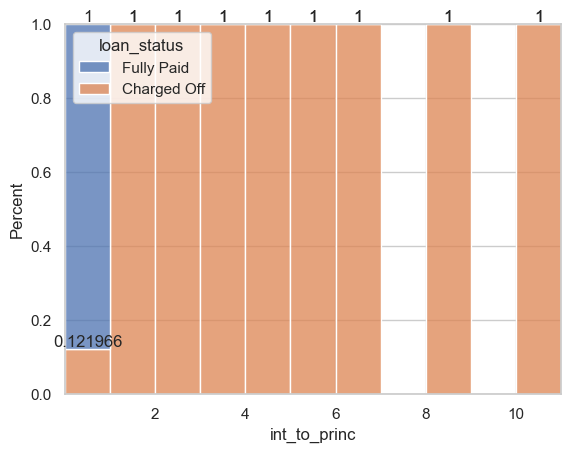

In [310]:
#Finding the ration between interest to principal paid
loanDF["int_to_princ"] = loanDF["total_rec_int"]/loanDF["total_rec_prncp"]
ax = sns.histplot(x=loanDF["int_to_princ"],hue = loanDF["loan_status"],stat = "percent",multiple='fill',binwidth=1)

for i in ax.containers:
    print(i)
    ax.bar_label(i,)
    


#### Observation : When the total received interest to principle ratio is more than 1   customers totally chargeOff,considering a susbstantial part of amount they paid went to interest.

In [311]:
#Deriving the issued year and month from the issued date
loanDF["issue_d"] = pd.to_datetime(loanDF['issue_d'], format='%b-%y')
loanDF.loc[:, 'issued_year'] = loanDF.issue_d.dt.year
loanDF.loc[:, 'issued_month'] = loanDF.issue_d.dt.month

In [312]:
loanDF.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,default,payment_diff,pymnt_percentage,int_to_princ,issued_year,issued_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0,-863.155187,1.172631,0.172632,2011,12
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1,1491.290000,0.403484,0.953358,2011,12
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0,-605.666844,1.252361,0.252362,2011,12
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0,-2231.890000,1.223189,0.221492,2011,12
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0,-632.210000,1.126442,0.126442,2011,12


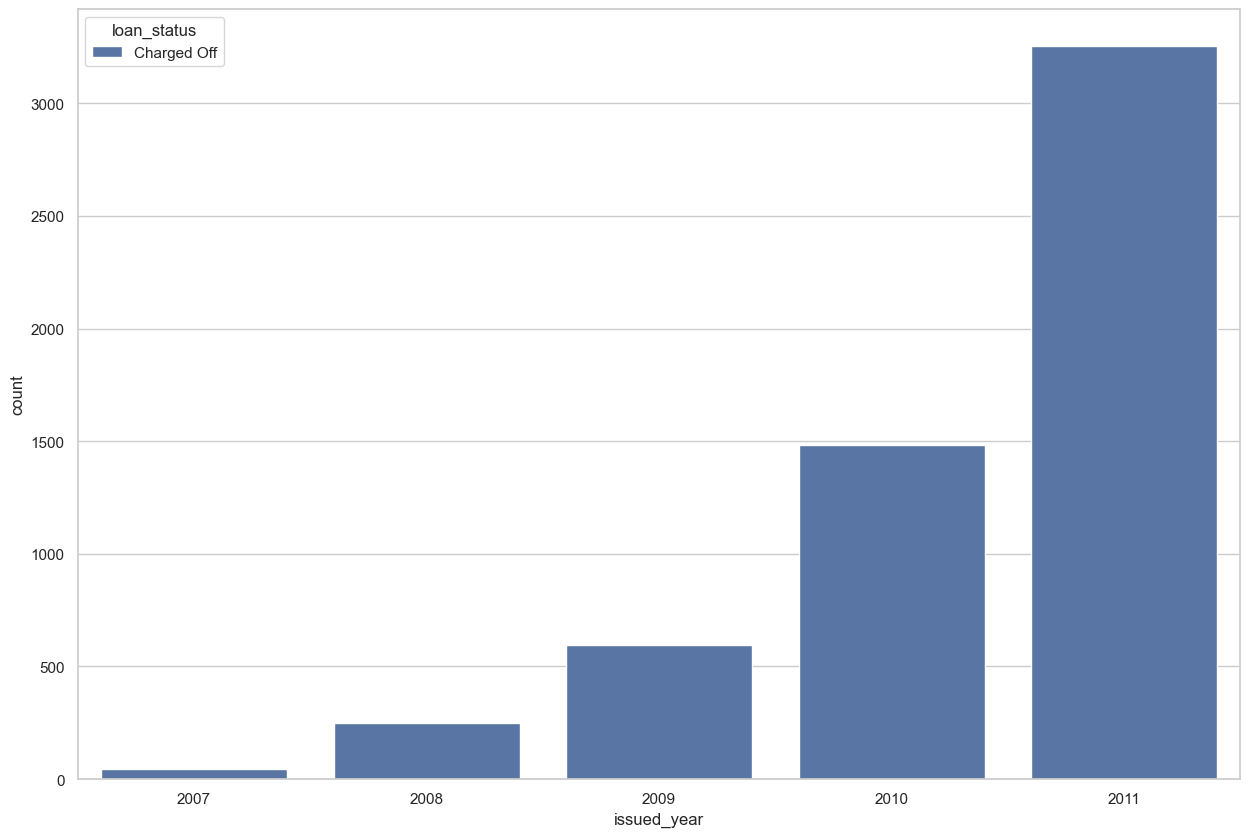

In [313]:
plt.figure(figsize=(15, 10))
loanDFDefault = loanDF[loanDF['loan_status']=='Charged Off']
sns.countplot(x="issued_year",data=loanDFDefault,hue='loan_status', order=loanDF["issued_year"].value_counts().index.sort_values())
plt.show()

#### Observation: As observed here we have the charged off customers increaseing every year.

## Consclusion 

### Below are some of the key factors that are impacting the defaulters list:

- Higher interest rate plays a role in the defaulters
- Defaulters are increasing every year
- Lower grade people have higher ratio of defaulters
- Higher percentage of defaulters fall in the top 3 categories of small businesses, renewable energy, education
- When the debt to income ratio of the customer increases, the ability to repay the loan reduces so charge Off percentage increases
- 91% of defaulters are either paying rent or Mortgage